# TRABAJO PRÁCTICO II (Materia Completa)

Alternativa 1: Redes Recurrentes
Grupo 16:
* Pedro Bonafe
* Aldana Ruscitti

# Librerías

In [1]:
%pip install torch
%pip install torchvision
%pip install torchsummary
%pip install pandas_profiling
%pip install sweetviz 
%pip install scikit-learn
%pip install tensorflow
%pip install nlp
%pip install gensim

%pip install torchtext

Note: you may need to restart the kernel to use updated packages.
  Using cached torchvision-0.16.1-cp39-cp39-macosx_11_0_arm64.whl (1.5 MB)
  Using cached torch-2.1.1-cp39-none-macosx_11_0_arm64.whl (59.6 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0
    Uninstalling torch-2.1.0:
      Successfully uninstalled torch-2.1.0
Note: you may need to restart the kernel to use updated packages.
  Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.6.1-py2.py3-none-any.whl (357 kB)
  Using cached typeguard-4.1.5-py3-none-any.whl (34 kB)
  Using cached phik-0.12.3-cp39-cp39-macosx_11_0_arm64.whl (649 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached multime

In [2]:
!python -m spacy download en_core_web_sm

/Users/aldi/opt/anaconda3/bin/python: No module named spacy


In [3]:
%pip install spacy

  Using cached spacy-3.7.2-cp39-cp39-macosx_11_0_arm64.whl (6.6 MB)
  Using cached srsly-2.4.8-cp39-cp39-macosx_11_0_arm64.whl (491 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached thinc-8.2.1-cp39-cp39-macosx_11_0_arm64.whl (791 kB)
  Using cached murmurhash-1.0.10-cp39-cp39-macosx_11_0_arm64.whl (26 kB)
  Using cached weasel-0.3.4-py3-none-any.whl (50 kB)
  Using cached cymem-2.0.8-cp39-cp39-macosx_11_0_arm64.whl (41 kB)
  Using cached preshed-3.0.9-cp39-cp39-macosx_11_0_arm64.whl (129 kB)
  Using cached confection-0.1.3-py3-none-any.whl (34 kB)
  Using cached blis-0.7.11-cp39-cp39-macosx_11_0_arm64.whl (1.1 MB)
  Using cached cloudpathlib-0.16.0-py3-none-any.whl (45 kB)
Note: you may need to restart the kernel to use updated pa

In [4]:
%pip install nltk

import nltk
nltk.download('all')

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import torch
import tqdm
import sweetviz as sv
import seaborn as sns


import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from keras import layers, models
import torch.optim as optim

from sklearn import datasets
from sklearn.model_selection import train_test_split

import nlp

from gensim import models
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer,WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import torchtext.vocab as vocab
import gensim.downloader as api

# Dataset y EDA

In [2]:
#C:\Users\pbonafe\Diplo\Deep Learning\dataset\Sarcasm_Headlines_Dataset.json
df_sarcasm = pd.read_json("dataset/Sarcasm_Headlines_Dataset.json", lines= True)
df_sarcasm

article_link  \
0      https://www.huffingtonpost.com/entry/versace-b...   
1      https://www.huffingtonpost.com/entry/roseanne-...   
2      https://local.theonion.com/mom-starting-to-fea...   
3      https://politics.theonion.com/boehner-just-wan...   
4      https://www.huffingtonpost.com/entry/jk-rowlin...   
...                                                  ...   
26704  https://www.huffingtonpost.com/entry/american-...   
26705  https://www.huffingtonpost.com/entry/americas-...   
26706  https://www.huffingtonpost.com/entry/reparatio...   
26707  https://www.huffingtonpost.com/entry/israeli-b...   
26708  https://www.huffingtonpost.com/entry/gourmet-g...   

                                                headline  is_sarcastic  
0      former versace store clerk sues over secret 'b...             0  
1      the 'roseanne' revival catches up to our thorn...             0  
2      mom starting to fear son's web series closest ...             1  
3      boehner just wants wife to listen, not come up...             1  
4      j.k. rowling wishes snape happy birthday in th...             0  
...                                                  ...           ...  
26704               american politics in moral free-fall             0  
26705                            america's best 20 hikes             0  
26706                              reparations and obama             0  
26707  israeli ban targeting boycott supporters raise...             0  
26708                  gourmet gifts for the foodie 2014             0  

[26709 rows x 3 columns]

In [3]:
analyze_report = sv.analyze(df_sarcasm)
analyze_report.show_html('results/df_sarcasm_EDAreport.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report results/df_sarcasm_EDAreport.html was generated.


En el reporte se puede observar que las etiquetas de sarcasmo estan balanceadas y que tenemos aproximadamente 27mil datos de headline donde solo algunos pocos se repiten. Ademas no contamos con datos nulos.

In [4]:
#Eliminamos el link al dataset porque para este trabajo no haremos scrapping del contenido, nos basaremos en el encabezado
#En otra instancia podría hacerse scraping de cada artículo para hacer un análisis más fino. 

df_sarcasm = df_sarcasm.drop("article_link", axis=1)

In [5]:
seed = 15

X = df_sarcasm['headline'].values
y = df_sarcasm['is_sarcastic'].values

# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

print(f'Cantidad de datos en train: {X_train.shape[0]}')
print(f'Cantidad de datos en validación: {X_val.shape[0]}')
print(f'Cantidad de datos en test: {X_test.shape[0]}')

Cantidad de datos en train: 18696
Cantidad de datos en validación: 4006
Cantidad de datos en test: 4007


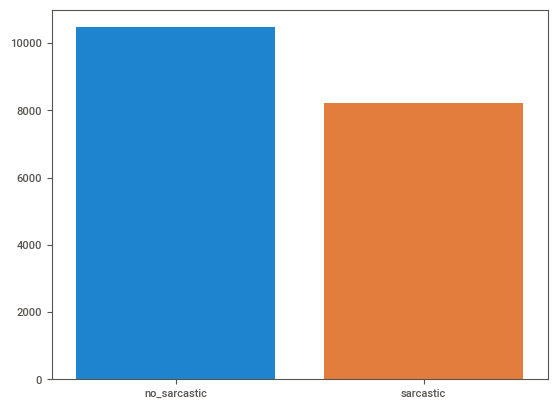

In [6]:
target_dist = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['no_sarcastic','sarcastic']),y=target_dist.values)
plt.show()

# 1. Procesamiento de Texto

En esta sección tokenizamos y limpiamos los textos pasando a minusculas, eliminando caracteres especiales y stopwords. Obtenemos las 5000 palabras más utilizadas en el conjunto de datos. Luego, a estas palabras se les asigna un identificador único, formando un diccionario para one-hot encoding.

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pbonafe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import re
def preprocess_string(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #Elimino caracteres especiales y puntuaciones
    return text 

Primer metodo de tokenización bag of words

In [10]:
from collections import Counter

def tokenize(x_train, y_train, x_val, y_val):
    word_list = []
    stop_words = set(stopwords.words('english'))
    onehot_dict = {}
    
    for sentence in x_train: #Recorro cada headline
        tokens = sentence.lower().split()
        filtered_tokens = [preprocess_string(word) for word in tokens if preprocess_string(word) not in stop_words and preprocess_string(word) != '']
        word_list.extend(filtered_tokens)
    
    # Contando las palabras y seleccionando las más comunes
    corpus = Counter(word_list)
    corpus_ = sorted(corpus, key=corpus.get, reverse=True)[:5000]
    
    # Creando el diccionario
    onehot_dict = {w: i + 1 for i, w in enumerate(corpus_)}
    
    # Tokenización final para entrenamiento y validación
    final_list_train = []
    final_list_test = []


    for sentence in x_train:
        final_list_train.append([onehot_dict[preprocess_string(word)] for word in sentence.lower().split()
                                 if preprocess_string(word) in onehot_dict.keys()])
    
    for sentence in x_val:
        final_list_test.append([onehot_dict[preprocess_string(word)] for word in sentence.lower().split()
                                if preprocess_string(word) in onehot_dict.keys()])
    
    return final_list_train, y_train, final_list_test, y_val, onehot_dict

In [11]:
x_train,y_train,x_val,y_val,vocab = tokenize(X_train,y_train,X_val,y_val)

In [12]:
print(x_train[10])
print(y_train[10])

[3810, 1977, 534, 99, 190, 2130, 301]
1


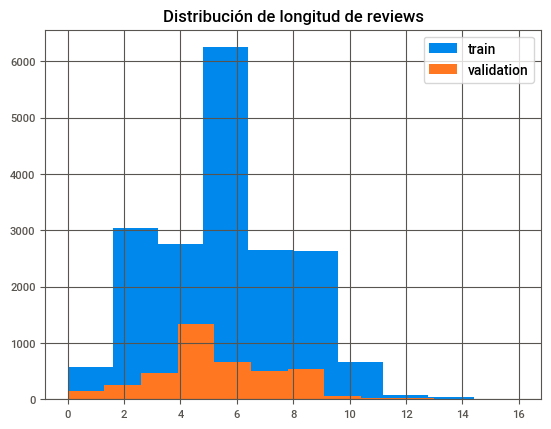

In [13]:
rev_len_train = [len(i) for i in x_train]
rev_len_val = [len(i) for i in x_val]

pd.Series(rev_len_train).hist(label ='train')
pd.Series(rev_len_val).hist(label='validation')
plt.legend()
plt.title('Distribución de longitud de reviews')
plt.show()

Como no hay una longitud muy variable de los headlines consideramos que no es necesario realizar un tratamiento extra.

# 2. RNN Simple

## Tensores de entrada

In [14]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset,DataLoader

In [18]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# Padding sequences to a fixed length (adjust maxlen according to your data)
maxlen = 16  # Example: pad or truncate sequences to a length of 100

# Padding x_train and x_val sequences
x_train_pad = pad_sequences(x_train, maxlen=maxlen, dtype='float32')
x_val_pad = pad_sequences(x_val, maxlen=maxlen, dtype='float32')

# Convert y_train and y_val to NumPy arrays
x_train = np.array(x_train_pad)
x_val = np.array(x_val_pad)

In [16]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_val), torch.from_numpy(y_val))


# dataloaders
batch_size = 100


# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)


# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Training set:')
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample output: \n', sample_y)


# obtain one batch of training data
dataiter = iter(valid_loader)
sample_x, sample_y = next(dataiter)

print('\n')
print('Validation dataset:')
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample output: \n', sample_y)

Training set:
Sample input size:  torch.Size([100, 16])
Sample input: 
 tensor([[   0.,    0.,    0.,  ...,  363.,  138., 2713.],
        [   0.,    0.,    0.,  ...,    0.,  969.,  670.],
        [   0.,    0.,    0.,  ..., 3945.,  127.,  585.],
        ...,
        [   0.,    0.,    0.,  ..., 2779., 4819., 2779.],
        [   0.,    0.,    0.,  ..., 2473.,  290.,  366.],
        [   0.,    0.,    0.,  ...,   33.,  243.,  378.]])
Sample output: 
 tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0])


Validation dataset:
Sample input size:  torch.Size([100, 16])
Sample input: 
 tensor([[   0.,    0.,    0.,  ...,  931., 2222., 2319.],
        [   0.,    0.,    0.,  ..., 1436., 2258., 2894.],
        [   

## Modelo

In [17]:
class LSTMModel(nn.Module):
    def __init__(self,
                 layers_number, #
                 vocab_size, # Tambien se lo suele escribir como input_size
                 hidden_dim, #
                 embedding_dim, #
                 dropout=0.5):

        super(LSTMModel,self).__init__()

        self.output_dim = output_dim # La cantidad de clases a predecir
        self.hidden_dim = hidden_dim #El numero de nodos en cada capa LSTM (similar a una full conected layer)

        self.layers_number = layers_number # Número de capas LSTM en la red
        self.vocab_size = vocab_size # Tamaño del vocabulario, es decir el número de palabras distintas

        # embedding and LSTM layers
        # Dimension de los vectores de embeddings para representar las palabras
        # Es una matriz que tiene tantas filas como palabras y tantas columnas como la dimension
        # del vector que definimos
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # La capa lstm toma como entrada los embeddings
        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=self.hidden_dim, #Representa la cantidad de features en el estado oculto
                           num_layers=layers_number, #Numero de capas recurrentes
                            batch_first=True) #El batch es la primera dimension, nuestros datos tienen la dimension (batch_size, seq_len, features)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.lineal = nn.Linear(self.hidden_dim, output_dim) #Transforma las LSTM en un vector de dimension igual al numero de clases
        self.sigmoid = nn.Sigmoid()

    def forward(self,x,hidden):
        batch_size = x.size(0) # Calcula el tamaño del lote dentro de los datos de entrada

        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: BATCH x SENQUENCE_LENGHT x FEATURES   since batch = True (Features es la cantidad total de palabras)
        #print(embeds.shape)  #[X, Y,Z]
        lstm_out, hidden = self.lstm(embeds, hidden) # Obtenemos las celdas de salidas y un nuevo estado oculto

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) # Redimensiona para tener la forma (batch_size*seq_len, hidden_dim) -> tensor de 2 dimensiones

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.lineal(out)

        # sigmoid function
        sig_out = self.sigmoid(out)

        #Redimensionamos para tener dimension (batch_size, -1),
        #es decir para obtener las predicciones finales de la red LSTM de cada lote
        sig_out = sig_out.view(batch_size, -1)


        sig_out = sig_out[:, -1] # Selecciona la ultima columna de la variable sig_out que contiene, en general, los resultados de la capa lineal

        # return last sigmoid output and hidden state
        return sig_out, hidden

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.layers_number,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.layers_number,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [18]:
layers_number = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
#Como tenemos un problema de clasificacion binaria y aplicamos la funcion sigmoide
# La salida es un tensor unimensional cuyo valor de activacion nos indica la probabilidad
# de pertenencia a la clase
output_dim = 1
hidden_dim = 256


model = LSTMModel(layers_number,
                  vocab_size,
                  hidden_dim,
                  embedding_dim,
                  dropout=0.5)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda') if use_cuda else torch.device('cpu')

#moving to gpu
model.to(device)
print(model)

LSTMModel(
  (embedding): Embedding(5001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (lineal): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [19]:
# loss and optimization functions

lr=0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


# function to predict accuracy
def acc(pred,label):
    #Nos aseguramos que tanto pred como label tengan las mismas dimensiones
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item() #Cantidad de predicciones correctas


In [20]:
from tqdm.notebook import tqdm, trange

In [21]:
clip = 5
EPOCHS = 30
valid_loss_min = np.Inf

# train for some number of epochs
epoch_tr_loss = []
epoch_vl_loss = []

epoch_tr_acc = []
epoch_vl_acc = []


#for epoch in trange(EPOCHS):
for epoch in trange(EPOCHS):
  train_losses = []
  train_acc = 0.0
  model.train()

  # initialize hidden state
  # Establecemos el estado inicial en cero
  hidden = model.init_hidden(batch_size)

  # Dado que el dataset tiene x datos y pusimos un batch de y
  # vamos a hacer n pasos de entrenamiento
  for inputs, labels in tqdm(train_loader):
      inputs = inputs.to(torch.int64)
      inputs = inputs.to(device)
      labels = labels.to(device)

      # Creamos nuevas variables para el estado oculto,
      # de otra manera propagariamos a lo largo de toda la historia de entrenamiento teniendo problemas del explosion del gradiente.
      # El estado oculto se actualiza en cada paso de tiempo
      # Con la linea siguiente "devinculamos" el estado oculto de cualquier calculo anterior
      # y solo extraemos sus valores copiandolos con each.data
      hidden = tuple([each.data for each in hidden])

      model.zero_grad()
      output,hidden = model(inputs,hidden) #Realizamos un paso hacia adelante

      # Calculamos la loss y hacemos el backpropagation
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()

      train_losses.append(loss.item())

      # calculating accuracy
      accuracy = acc(output,labels)
      train_acc += accuracy

      #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
      # Limita la norma de los gradientes al valor especificado en clip
      # model.parameters() es una lista de los parámetros del modelo,
      # que son tensores en los que se almacenan los gradientes después de realizar la retropropagación del error.
      nn.utils.clip_grad_norm_(model.parameters(), clip)
      optimizer.step()

  val_h = model.init_hidden(batch_size)
  val_losses = []
  val_acc = 0.0
  model.eval()
  for inputs, labels in valid_loader:
          val_h = tuple([each.data for each in val_h])
          inputs = inputs.to(torch.int64)
          inputs =  inputs.to(device)
          labels = labels.to(device)


          output, val_h = model(inputs, val_h)
          val_loss = criterion(output.squeeze(), labels.float())


          val_losses.append(val_loss.item())

          accuracy = acc(output,labels)
          val_acc += accuracy

  epoch_train_loss = np.mean(train_losses)
  epoch_val_loss = np.mean(val_losses)

  epoch_train_acc = train_acc/len(train_loader.dataset)
  epoch_val_acc = val_acc/len(valid_loader.dataset)

  epoch_tr_loss.append(epoch_train_loss)
  epoch_vl_loss.append(epoch_val_loss)

  epoch_tr_acc.append(epoch_train_acc)
  epoch_vl_acc.append(epoch_val_acc)

  print(f'Epoch {epoch+1}')
  print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
  print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')

  if epoch_val_loss <= valid_loss_min:
      torch.save(model.state_dict(), 'state_dict.pt')
      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
      valid_loss_min = epoch_val_loss
  print(25*'==')

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 1
train_loss : 0.6360835189460426 val_loss : 0.5898307517170907
train_accuracy : 62.37163029525033 val_accuracy : 67.24912631053421
Validation loss decreased (inf --> 0.589831).  Saving model ...


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 2
train_loss : 0.5336025373269153 val_loss : 0.5301016330718994
train_accuracy : 72.0849379546427 val_accuracy : 71.31802296555168
Validation loss decreased (0.589831 --> 0.530102).  Saving model ...


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 3
train_loss : 0.4433354211430396 val_loss : 0.5097775541245937
train_accuracy : 78.02738553701326 val_accuracy : 74.48826759860209
Validation loss decreased (0.530102 --> 0.509778).  Saving model ...


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 4
train_loss : 0.3620372163031691 val_loss : 0.5177444063127041
train_accuracy : 83.03380402225075 val_accuracy : 75.23714428357464


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 5
train_loss : 0.28451355795065564 val_loss : 0.542499202489853
train_accuracy : 86.88489516474111 val_accuracy : 75.83624563155267


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 6
train_loss : 0.20559736124930844 val_loss : 0.6458391562104225
train_accuracy : 90.64505776636713 val_accuracy : 76.16075886170744


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 7
train_loss : 0.13165513373991494 val_loss : 0.809618915617466
train_accuracy : 94.20196833547283 val_accuracy : 75.18721917124313


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 8
train_loss : 0.08138343769936793 val_loss : 1.0316826865077018
train_accuracy : 96.2451861360719 val_accuracy : 76.63504742885672


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 9
train_loss : 0.057309534590971725 val_loss : 1.111812062561512
train_accuracy : 97.2667950363714 val_accuracy : 76.2855716425362


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 10
train_loss : 0.04023154407379127 val_loss : 1.3535242602229118
train_accuracy : 98.00492083868207 val_accuracy : 75.4618072890664


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 11
train_loss : 0.030714922653441067 val_loss : 1.4854342222213746
train_accuracy : 98.30445014976465 val_accuracy : 76.3854218671992


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 12
train_loss : 0.0252293804043939 val_loss : 1.7695603489875793
train_accuracy : 98.42747111681643 val_accuracy : 76.31053419870196


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 13
train_loss : 0.021135776339384217 val_loss : 1.6377548217773437
train_accuracy : 98.73234916559693 val_accuracy : 75.88617074388418


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 14
train_loss : 0.016984690530275705 val_loss : 2.0532271564006805
train_accuracy : 98.78583654257595 val_accuracy : 76.80978532201698


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 15
train_loss : 0.020862383906909775 val_loss : 2.3048976361751556
train_accuracy : 98.6788617886179 val_accuracy : 75.93609585621567


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 16
train_loss : 0.016309120326167752 val_loss : 2.1376710146665574
train_accuracy : 98.79653401797177 val_accuracy : 76.18572141787318


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 17
train_loss : 0.01855278752918821 val_loss : 2.000072105228901
train_accuracy : 98.74304664099273 val_accuracy : 75.23714428357464


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 18
train_loss : 0.013927592486750224 val_loss : 1.7750887975096703
train_accuracy : 98.94629867351306 val_accuracy : 76.33549675486769


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 19
train_loss : 0.010678982977869279 val_loss : 2.1130699634552004
train_accuracy : 99.0211810012837 val_accuracy : 76.36045931103345


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 20
train_loss : 0.009292007131334294 val_loss : 2.674893380701542
train_accuracy : 99.01583226358579 val_accuracy : 75.16225661507738


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 21
train_loss : 0.008142897565272917 val_loss : 2.8615866392850875
train_accuracy : 99.04257595207531 val_accuracy : 75.88617074388418


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 22
train_loss : 0.01011830722485664 val_loss : 2.350642827153206
train_accuracy : 99.03722721437741 val_accuracy : 74.78781827259111


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 23
train_loss : 0.021862719688528237 val_loss : 1.6126305118203164
train_accuracy : 98.56653829696191 val_accuracy : 75.98602096854718


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 24
train_loss : 0.02685752245741496 val_loss : 1.6697181165218353
train_accuracy : 98.65211810012838 val_accuracy : 75.83624563155267


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 25
train_loss : 0.014961810928696806 val_loss : 1.7045957565307617
train_accuracy : 98.8660676080445 val_accuracy : 76.48527209186221


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 26
train_loss : 0.014363198797093324 val_loss : 1.6511043459177017
train_accuracy : 98.82862644415917 val_accuracy : 75.88617074388418


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 27
train_loss : 0.011604723048030889 val_loss : 1.8245468735694885
train_accuracy : 98.97839109970047 val_accuracy : 76.36045931103345


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 28
train_loss : 0.0084248127925328 val_loss : 2.0829748421907426
train_accuracy : 99.08001711596063 val_accuracy : 76.11083374937594


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 29
train_loss : 0.006591419360472261 val_loss : 2.2711474031209944
train_accuracy : 99.11745827984596 val_accuracy : 76.41038442336495


  0%|          | 0/186 [00:00<?, ?it/s]

Epoch 30
train_loss : 0.006441792823205751 val_loss : 2.481158176064491
train_accuracy : 99.11210954214805 val_accuracy : 76.21068397403894


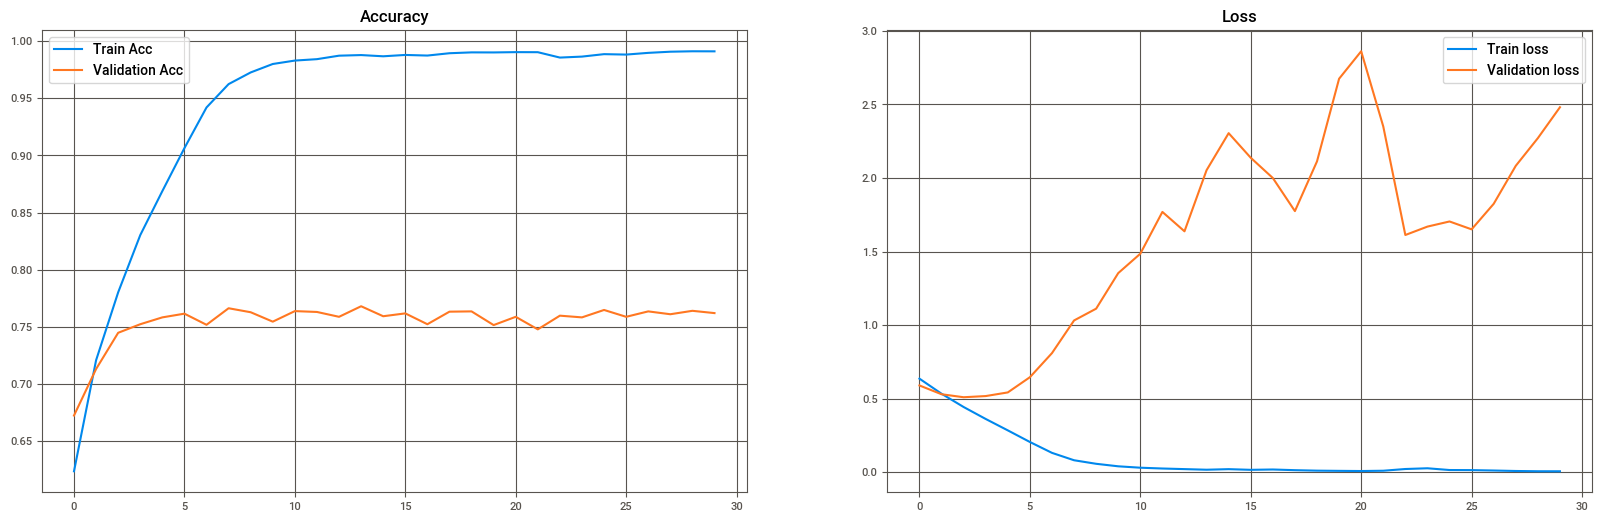

In [22]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()


plt.show()

Como podemos ver el modelo aprende pero con una performance bastante mala, la loss en el conjunto de validación es errática y alta lo cual nos dice que nuestro modelo no generaliza

# 3. Optimización

In [23]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_val), torch.from_numpy(y_val))


# dataloaders
batch_size = 100


# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)


# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Training set:')
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample output: \n', sample_y)


# obtain one batch of training data
dataiter = iter(valid_loader)
sample_x, sample_y = next(dataiter)

print('\n')
print('Validation dataset:')
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample output: \n', sample_y)

Training set:
Sample input size:  torch.Size([100, 16])
Sample input: 
 tensor([[   0.,    0.,    0.,  ...,    0.,  744., 2620.],
        [   0.,    0.,    0.,  ..., 1996.,  595., 1601.],
        [   0.,    0.,    0.,  ...,  159.,  383.,  107.],
        ...,
        [   0.,    0.,    0.,  ...,   10.,  286.,  655.],
        [   0.,    0.,    0.,  ...,  267.,  243.,  352.],
        [   0.,    0.,    0.,  ..., 2115., 1493.,  939.]])
Sample output: 
 tensor([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1])


Validation dataset:
Sample input size:  torch.Size([100, 16])
Sample input: 
 tensor([[   0.,    0.,    0.,  ..., 4556.,  531.,  236.],
        [   0.,    0.,    0.,  ...,  635., 1426., 1045.],
        [   

In [24]:
import itertools
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

epochs_list = [20]
layers_list = [2, 3, 4]
dropout_list = [0.3, 0.5, 0.7]

best_accuracy = 0.0
best_epochs = None
best_layers = None
best_dropout = None

# (Código para dividir tus datos en conjuntos de entrenamiento y validación)
# train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
# valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

# Bucle para probar diferentes combinaciones de hiperparámetros
for epochs in epochs_list:
    print(epochs)
    for layers in layers_list:
        print(layers)
        for dropout in dropout_list:
            print(dropout)
            # Crea el modelo con los hiperparámetros actuales
            model = LSTMModel(layers, vocab_size, hidden_dim, embedding_dim, dropout)
            use_cuda = torch.cuda.is_available()
            device = torch.device('cuda') if use_cuda else torch.device('cpu')
            model.to(device)

            criterion = nn.BCELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


            # Entrenamiento del modelo con los datos
            for epoch in trange(epochs):
                model.train()
                train_losses = []
                train_acc = 0.0
                hidden = model.init_hidden(batch_size)

                for inputs, labels in tqdm(train_loader):
                    inputs = inputs.to(torch.int64).to(device)
                    labels = labels.to(device)

                    model.zero_grad()
                    hidden = tuple([each.data for each in hidden])
                    output, hidden = model(inputs, hidden)
                    loss = criterion(output.squeeze(), labels.float())
                    loss.backward()
                    optimizer.step()

                    train_losses.append(loss.item())
                    accuracy = acc(output, labels)
                    train_acc += accuracy
                    
                    hidden = model.init_hidden(batch_size)

                # Calcula la precisión y la pérdida promedio en el conjunto de entrenamiento
                epoch_train_loss = np.mean(train_losses)
                epoch_train_acc = train_acc / len(train_loader.dataset)

                # (Opcional: Imprime métricas de entrenamiento por época)

            # Evaluación en el conjunto de validación
            model.eval()
            val_losses = []
            val_acc = 0.0

            for inputs, labels in valid_loader:
                inputs = inputs.to(torch.int64).to(device)
                labels = labels.to(device)

                hidden = model.init_hidden(batch_size)
                output, hidden = model(inputs, hidden)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())
                accuracy = acc(output, labels)
                val_acc += accuracy

            # Calcula la precisión y la pérdida promedio en el conjunto de validación
            epoch_val_loss = np.mean(val_losses)
            epoch_val_acc = val_acc / len(valid_loader.dataset)

            # Verifica si este conjunto de hiperparámetros supera al mejor obtenido hasta ahora
            if epoch_val_acc > best_accuracy:
                best_accuracy = epoch_val_acc
                best_epochs = epochs
                best_layers = layers
                best_dropout = dropout
                
            train_losses.append(epoch_train_loss)
            train_accuracies.append(epoch_train_acc)
            val_losses.append(epoch_val_loss)
            val_accuracies.append(epoch_val_acc)

# Imprimir los mejores hiperparámetros encontrados
print(f"Mejor precisión: {best_accuracy}")
print(f"Mejor número de épocas: {best_epochs}")
print(f"Mejor cantidad de capas: {best_layers}")
print(f"Mejor valor de dropout: {best_dropout}")

20
2
0.3


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

0.5


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

0.7


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

3
0.3


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

0.5


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

0.7


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

4
0.3


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

0.5


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

0.7


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

Mejor precisión: 0.7718422366450325
Mejor número de épocas: 20
Mejor cantidad de capas: 2
Mejor valor de dropout: 0.3


# 4. Interpretación

In [25]:
len(train_accuracies)

9

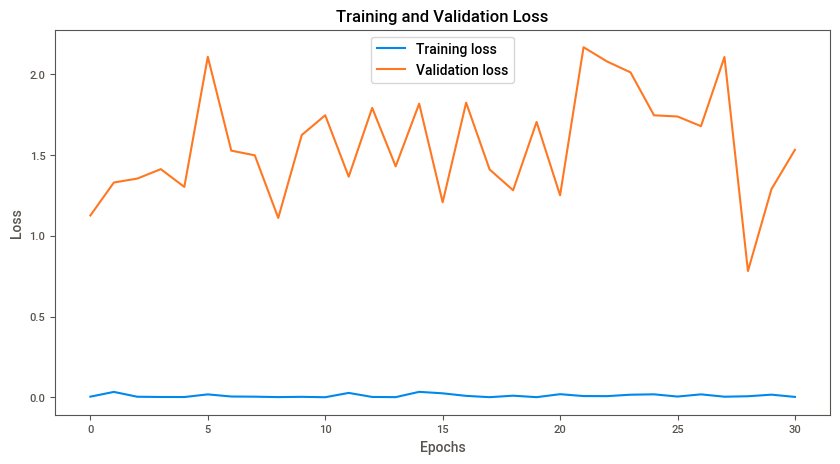

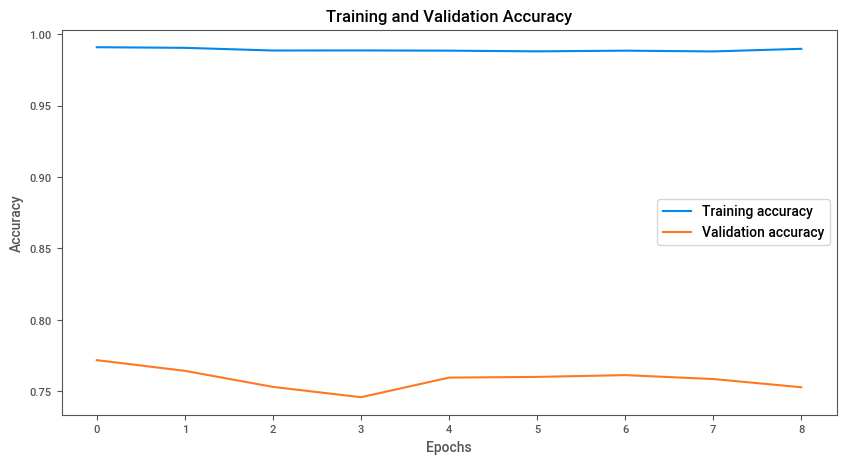

In [26]:
import matplotlib.pyplot as plt

# Graficar las curvas de aprendizaje (pérdida)
plt.figure(figsize=(10, 5))
plt.plot(train_losses[:31], label='Training loss')
plt.plot(val_losses[:31], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Graficar las curvas de aprendizaje (precisión)
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

El modelo no parece aprender mucho, la función de loss del conjunto de validación no tiene una tendencia decreciente, sino más bien errática, además la accuracy de validación es bastante más baja que la del training, lo cual habla de que no generaliza.

# Prueba con otros modelos

Probaremos con otros modelos de redes más simples y con distintas formas de tokenización de las palabras de cada headline. 
Para esto no utilizaremos bag of words sino que aplicaremos la herramienta de nltk word_tokenize y lematize_text. Ademas utilizaremos los modelo de embeadings word2vec y glove vistos en clases. 
Utilizaremos también una librería de limpieza y preprocesamiento de texto más exaustiva creada por nosotros para la mentoría de detección automática de plagio. 


#### Modelo mas simple

Funciona, pero funciona mejor el visto en clase

In [27]:
from resourses.segmentador import Segmentador
from resourses.cleaner import CleanText

In [28]:
df_sarcasm['texto_limpo'] = df_sarcasm['headline'].apply(lambda x: CleanText(str(x)).lemmatizeText())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbonafe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbonafe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbonafe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbonafe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbonafe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbonafe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pbonafe\Ap

#### Word2vec

In [43]:
# Tokenizar el texto
tokenized_text = df_sarcasm['texto_limpo'].apply(word_tokenize)

# Entrenar el modelo Word2Vec
model_wv = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Función para obtener el vector de un texto
def get_vector(text):
    tokens = word_tokenize(text)
    vector = sum(model_wv.wv[word] for word in tokens if word in model_wv.wv)
    return vector

# Aplicar la función a la columna 'texto_limpo'
df_sarcasm['word2vec_vector'] = df_sarcasm['texto_limpo'].apply(get_vector)
df_sarcasm

headline  is_sarcastic  \
0      former versace store clerk sues over secret 'b...             0   
1      the 'roseanne' revival catches up to our thorn...             0   
2      mom starting to fear son's web series closest ...             1   
3      boehner just wants wife to listen, not come up...             1   
4      j.k. rowling wishes snape happy birthday in th...             0   
...                                                  ...           ...   
26704               american politics in moral free-fall             0   
26705                            america's best 20 hikes             0   
26706                              reparations and obama             0   
26707  israeli ban targeting boycott supporters raise...             0   
26708                  gourmet gifts for the foodie 2014             0   

                                             texto_limpo  \
0      former versace store clerk sue secret black co...   
1      roseanne revival catch thorny political mood b...   
2      mom starting fear son web series closest thing...   
3      boehner want wife listen come alternative debt...   
4       jk rowling wish snape happy birthday magical way   
...                                                  ...   
26704                   american politics moral freefall   
26705                                  america best hike   
26706                                   reparation obama   
26707  israeli ban targeting boycott supporter raise ...   
26708                                gourmet gift foodie   

                                         word2vec_vector  
0      [-1.1404539, 2.9828243, 1.5861558, 0.6720802, ...  
1      [-0.6266583, 1.544877, 0.83044046, 0.38250837,...  
2      [-1.444721, 3.536207, 1.7848885, 0.8778865, -0...  
3      [-1.1743636, 2.974208, 1.5410064, 0.66806, -0....  
4      [-0.963143, 2.4667487, 1.2895308, 0.62751365, ...  
...                                                  ...  
26704  [-0.6132666, 1.4920719, 0.8022871, 0.3641385, ...  
26705  [-0.61582226, 1.5373586, 0.8438836, 0.4229507,...  
26706  [-0.435493, 1.0829699, 0.5893797, 0.2907584, -...  
26707  [-0.57439494, 1.4920917, 0.87502646, 0.323925,...  
26708  [-0.16369796, 0.41995034, 0.20823956, 0.095823...  

[26707 rows x 4 columns]

#### Glove

In [ ]:
import torchtext
from torchtext.vocab import GloVe

#lleva muchisimo tiempo, no necesariamente es conveniente.

# Tokenización de textos
tokenized_text = [torchtext.data.utils.get_tokenizer("spacy")(text) for text in df_sarcasm['texto_limpo']]

# Construcción del vocabulario
vocab = torchtext.vocab.build_vocab_from_iterator(tokenized_text)

# Cargar vectores GloVe preentrenados (50 dimensiones, puedes ajustar según tus necesidades)
glove_vectors = GloVe(name='6B', dim=100)

# Función para obtener el vector GloVe de un texto
def get_glove_vector(text):
    tokens = torchtext.data.utils.get_tokenizer("spacy")(text)
    vector = torch.mean(torch.stack([glove_vectors[token] for token in tokens if token in glove_vectors]), dim=0)
    return vector

# Aplicar la función a la columna 'texto_limpo'
df_sarcasm['glove_vector'] = df_sarcasm['texto_limpo'].apply(get_glove_vector)

df_sarcasm


c:\Users\pbonafe\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchtext\data\utils.py:105: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
"""
nlp = spacy.load("en_core_web_md")

# Función para obtener el vector de un texto usando el modelo GloVe
def get_glove_vector(text):
    tokens = nlp(text)
    vector = tokens.vector
    return vector

# Aplicar la función a la columna 'texto_limpo'
df_sarcasm['glove_vector'] = df_sarcasm['texto_limpo'].apply(get_glove_vector)

"""

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

## Aplicación de la Red Neuronal

Con el dataframe que logramos a partir de la limpieza, tokenización y vectorización con los embeadings word2vec y glove vamos a aplicar una red neuronal recurrente con el algoritmo LSTM para buscar predecir si el texto es sarcástico o no.

A fin de comparar la utilidad de los embeadings vamos a entrenar por separado un modelo usando la columna generada por el embeading word2vec y otra por el de glove. 

### Usando word2Vec y el modelo simple

In [118]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence

class SimpleLSTM(nn.Module):
    def __init__(self, imput_size, hidden_dim, output_dim, layers_number=1):
        super(SimpleLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.layers_number = layers_number

        #self.embedding = nn.Embedding(imput_size, imput_size)
        self.lstm = nn.LSTM(imput_size, hidden_dim, num_layers=layers_number, batch_first=True)
        self.dropout = nn.Dropout(0.3)
        self.linear = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        #embeds = self.embedding(x)
        #lstm_out, _ = self.lstm(embeds)
        lstm_out, _ = self.lstm(x)
        #print(lstm_out.shape)  # Agregado para imprimir la forma de lstm_out
        lstm_out = lstm_out[:, :]  # Obtener solo la última salida
        out = self.dropout(lstm_out)
        out = self.linear(out)
        out = self.sigmoid(out)
        return out.squeeze()



In [119]:
#Por algún motivo cuando genero el vector wor2vec_vector me genera valores que no son array al interior
#por lo que debemos eliminarlos con este filtro.
df_sarcasm = df_sarcasm[df_sarcasm['word2vec_vector'].apply(lambda x: isinstance(x, (list, np.ndarray)))]


In [120]:


desired_length = 100

# Obtener la columna 'sarcastic' como labels

# Obtener el tamaño del vector Word2Vec
embedding_dim = len(model_wv.wv['example'])


#features = np.vstack(df_sarcasm['word2vec_vector'].values)
features = [torch.tensor(vec, dtype=torch.float32) for vec in df_sarcasm['word2vec_vector']]

#padeo para que queden todos los vectores iguales
padded_features = pad_sequence(features, batch_first=True)

# Obtener la columna 'is_sarcastic' como labels
labels = torch.tensor(df_sarcasm['is_sarcastic'].values, dtype=torch.float32)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_features, labels, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

#X_train_tensor = X_train.to(torch.long)
#y_train_tensor = y_train
#X_test_tensor = X_test.to(torch.long)    # Asegurarse de que las entradas sean del tipo Long
#y_test_tensor = y_test

# Crear DataLoader para facilitar el manejo de los datos
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



C:\Users\pbonafe\AppData\Local\Temp\1\ipykernel_12316\2270302753.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
C:\Users\pbonafe\AppData\Local\Temp\1\ipykernel_12316\2270302753.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
C:\Users\pbonafe\AppData\Local\Temp\1\ipykernel_12316\2270302753.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
C:\Users\pbo

In [121]:
print("Dimensiones de las entradas antes del padding:", [x.shape for x in features])
padded_features = pad_sequence(features, batch_first=True)
print("Dimensiones de las entradas después del padding:", padded_features.shape)
print(labels.shape)


Dimensiones de las entradas antes del padding: [torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), torch.Size([100]), to

In [122]:
# Definir el modelo con parámetros personalizados
#vocab_size = len(vocab) + 1 # Tamaño del vocabulario
hidden_dim = 64
output_dim = 1
layers_number = 2

# Tamaño de la capa de embedding
#vocab_size = len(model_wv.wv.key_to_index) + 1  # +1 para el índice 0
#print(vocab_size)
#embedding_dim = padded_features.size(-1)
imput_size = X_train_tensor.size(1)  # Tamaño de la dimensión de entrada
print(imput_size)

model = SimpleLSTM(imput_size, hidden_dim, output_dim, layers_number)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

100


In [124]:
# function to predict accuracy
def acc(pred,label):
    #Nos aseguramos que tanto pred como label tengan las mismas dimensiones
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item() #Cantidad de predicciones correctas

In [125]:
# Define el número de épocas para entrenar el modelo
EPOCHS = 10

epoch_tr_loss = []
epoch_vl_loss = []

epoch_tr_acc = []
epoch_vl_acc = []

# Bucle para el entrenamiento del modelo
for epoch in range(EPOCHS):
    # Código para el entrenamiento por épocas
    train_losses = []
    train_acc = 0.0
    model.train()  # Poner el modelo en modo de entrenamiento

    for inputs, labels in train_loader:  # Iterar sobre los datos de entrenamiento
        inputs = inputs.to(torch.float32)
        optimizer.zero_grad()  # Reiniciar los gradientes acumulados en el optimizador
        output = model(inputs)  # Obtener las predicciones del modelo
        loss = criterion(output, labels.float())  # Calcular la pérdida entre las predicciones y las etiquetas reales
        loss.backward()  # Realizar la retropropagación para calcular los gradientes

        train_losses.append(loss.item())

        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy

        optimizer.step()  # Actualizar los pesos del modelo según los gradientes calculados

    # Código para la validación después de cada época (similar al entrenamiento, pero sin backward y step)
        
    val_losses = []
    val_acc = 0.0
    
    model.eval()  # Poner el modelo en modo de evaluación (desactiva dropout)



    with torch.no_grad():  # Desactivar el cálculo de gradientes en el conjunto de validación
        for inputs_val, labels_val in valid_loader:  # Iterar sobre los datos de validación
            inputs_val = inputs_val.to(torch.float32)
            output_val = model(inputs_val)  # Obtener las predicciones en el conjunto de validación
            val_loss = criterion(output_val, labels_val.float())  # Calcular la pérdida en el conjunto de validación

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc += accuracy
    # Imprimir la pérdida en entrenamiento y validación después de cada época
    print(f'Epoch [{epoch+1}/{EPOCHS}], Train Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)

    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)

    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)

    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)

    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')

    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), 'state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch [1/10], Train Loss: 0.6869656443595886, Validation Loss: 0.6845037937164307
Epoch 1
train_loss : 0.6388933667076562 val_loss : 0.7394995808601379
train_accuracy : 62.021998595834305 val_accuracy : 13.97903145282077
Validation loss decreased (inf --> 0.739500).  Saving model ...
Epoch [2/10], Train Loss: 0.5717062950134277, Validation Loss: 0.7177832126617432
Epoch 2
train_loss : 0.6393617198852721 val_loss : 0.7463350772857666
train_accuracy : 61.6569155160309 val_accuracy : 13.97903145282077
Epoch [3/10], Train Loss: 0.5721481442451477, Validation Loss: 0.6825462579727173
Epoch 3
train_loss : 0.63864899796997 val_loss : 0.7502102717757225
train_accuracy : 61.61479054528435 val_accuracy : 12.980529206190713
Epoch [4/10], Train Loss: 0.6879557967185974, Validation Loss: 0.8010035157203674
Epoch 4
train_loss : 0.6404344921340486 val_loss : 0.7359073996543884
train_accuracy : 61.32927685466885 val_accuracy : 11.982026959560658
Validation loss decreased (0.739500 --> 0.735907).  Savi

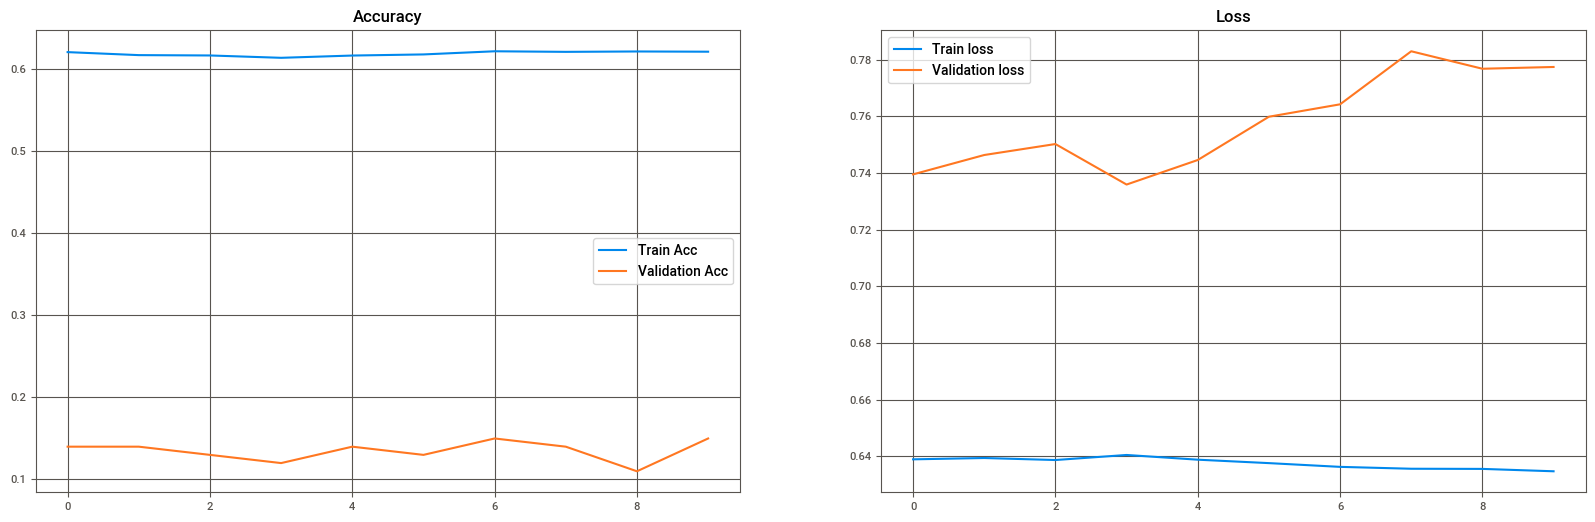

In [126]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()


plt.show()


Tiene una performance bastante mala con un accuracy bajo y un loss de validación muy alto. No parece aprender nada.

### Probando otros modelos del framework keras

In [69]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [71]:
features = df_sarcasm['texto_limpo'].values

# Obtener la columna 'is_sarcastic' como labels
labels = df_sarcasm['is_sarcastic'].values 


#Let's use 23,000 as our trainning size out of 27297 sentences
training_size = 23000
training_sentences = features[0:training_size]
testing_sentences = features[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Dividir el conjunto de datos en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

max_length = 100
vocab_size = 20000

trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

#Tokenizamos los datasets
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

#Encodeamos las sentencias en sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

#Realizamos un Padding de las sequences
training_padded = pad_sequences(training_sequences, padding='post')
testing_padded = pad_sequences(testing_sequences, padding='post')

#Convertimos a formato Numpy que puede ser usado en los embeadings
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Creamos nuestro propio embeading que aprenda del vocabulario de las sentencias

In [72]:
#Using dropout
#In addition to changing the learning rate parameter, it’s also worth considering using dropout in the LSTM layers
#Where random neurons are dropped to prevent a proximity bias from impacting the learning.

#Model architecture with stacking LSTMs
#Model architecture
import tensorflow as tf
from tensorflow import keras

#embedding dimension is often the fourth root of the size of the vocabulary, 
#when using RNNs you can ignored the rule, because it would make the size of the recurrent layer too small
embedding_dim = 64

model = tf.keras.Sequential([
 tf.keras.layers.Embedding(vocab_size, embedding_dim),
 #First LSTM layer
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True, dropout=0.2)),
 #Second LSTM layer
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.2)),

 tf.keras.layers.Dense(24, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])

#Adjusting a training rate
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)

#Compile the model
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])


print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1280000   
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1447985 (5.52 MB)
Trainable params: 144798

Epoch 1/30
575/575 [==============================] - 24s 34ms/step - loss: 0.6885 - accuracy: 0.5558 - val_loss: 0.6841 - val_accuracy: 0.5628
Epoch 2/30
575/575 [==============================] - 18s 32ms/step - loss: 0.6832 - accuracy: 0.5588 - val_loss: 0.6812 - val_accuracy: 0.5628
Epoch 3/30
575/575 [==============================] - 19s 33ms/step - loss: 0.6804 - accuracy: 0.5588 - val_loss: 0.6778 - val_accuracy: 0.5628
Epoch 4/30
575/575 [==============================] - 20s 35ms/step - loss: 0.6748 - accuracy: 0.5591 - val_loss: 0.6702 - val_accuracy: 0.5635
Epoch 5/30
575/575 [==============================] - 19s 34ms/step - loss: 0.6579 - accuracy: 0.5970 - val_loss: 0.6425 - val_accuracy: 0.6548
Epoch 6/30
575/575 [==============================] - 19s 33ms/step - loss: 0.5915 - accuracy: 0.7061 - val_loss: 0.5671 - val_accuracy: 0.7220
Epoch 7/30
575/575 [==============================] - 28s 49ms/step - loss: 0.4990 - accuracy: 0.7682 - val_loss: 0.5250 - val_accuracy:

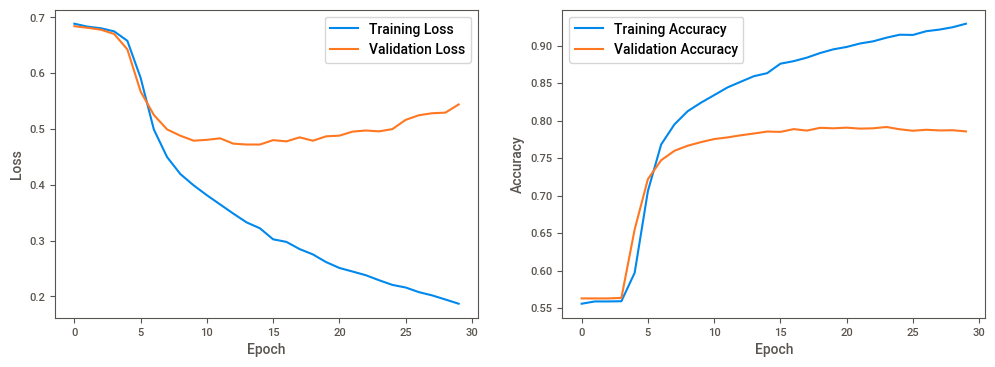

In [73]:
#Train the model
import matplotlib.pyplot as plt

#Number of epochs
No_of_epochs = 30

#If you dont want to tract the trained model uncomment below line
#model.fit(training_padded, training_labels, epochs=2, batch_size=32, validation_split=0.2)

# Train the model and keep track of accuracy history
history = model.fit(training_padded, training_labels, epochs= No_of_epochs, batch_size=32, validation_split=0.2)

# Plot training loss versus validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy versus validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

La performance se incrementa bastante, el validation loss disminuye respecto a los otros modelos y se estabiliza en un 50%-60%, en este modelo creamos un embeading propio, no utilizamos la tokenización de word2vec. Sería interesante combinar ambos para obtener un mejor resultado

## Codificacion word2vec + Embeading + estado oculto

Otro tipo de modelo con instancia de embeading y estado oculto, es el modelo visto en clase pero en lugar de tokenizaciones basadas en en count of words, usamos como feature el vector generado con word2vec, lo que ya es en si un embeading, por lo que sería una precapa de embeading.

In [76]:
class LSTMModel(nn.Module):
    def __init__(self,
                 layers_number, #
                 vocab_size, # Tambien se lo suele escribir como input_size
                 hidden_dim, #
                 embedding_dim, #
                 dropout=0.5):

        super(LSTMModel,self).__init__()

        self.output_dim = output_dim # La cantidad de clases a predecir
        self.hidden_dim = hidden_dim #El numero de nodos en cada capa LSTM (similar a una full conected layer)

        self.layers_number = layers_number # Número de capas LSTM en la red
        self.vocab_size = vocab_size # Tamaño del vocabulario, es decir el número de palabras distintas

        # embedding and LSTM layers
        # Dimension de los vectores de embeddings para representar las palabras
        # Es una matriz que tiene tantas filas como palabras y tantas columnas como la dimension
        # del vector que definimos
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # La capa lstm toma como entrada los embeddings
        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=self.hidden_dim, #Representa la cantidad de features en el estado oculto
                           num_layers=layers_number, #Numero de capas recurrentes
                            batch_first=True) #El batch es la primera dimension, nuestros datos tienen la dimension (batch_size, seq_len, features)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.lineal = nn.Linear(self.hidden_dim, output_dim) #Transforma las LSTM en un vector de dimension igual al numero de clases
        self.sigmoid = nn.Sigmoid()

    def forward(self,x,hidden):
        batch_size = x.size(0) # Calcula el tamaño del lote dentro de los datos de entrada

        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: BATCH x SENQUENCE_LENGHT x FEATURES   since batch = True (Features es la cantidad total de palabras)
        #print(embeds.shape)  #[X, Y,Z]
        lstm_out, hidden = self.lstm(embeds, hidden) # Obtenemos las celdas de salidas y un nuevo estado oculto

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) # Redimensiona para tener la forma (batch_size*seq_len, hidden_dim) -> tensor de 2 dimensiones

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.lineal(out)

        # sigmoid function
        sig_out = self.sigmoid(out)

        #Redimensionamos para tener dimension (batch_size, -1),
        #es decir para obtener las predicciones finales de la red LSTM de cada lote
        sig_out = sig_out.view(batch_size, -1)


        sig_out = sig_out[:, -1] # Selecciona la ultima columna de la variable sig_out que contiene, en general, los resultados de la capa lineal

        # return last sigmoid output and hidden state
        return sig_out, hidden

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.layers_number,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.layers_number,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [77]:
df_sarcasm = df_sarcasm[df_sarcasm['word2vec_vector'].apply(lambda x: isinstance(x, (list, np.ndarray)))]


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence

desired_length = 100

# Obtener la columna 'sarcastic' como labels
#labels = df_sarcasm['is_sarcastic'].values
#features = [torch.tensor(vec, dtype=torch.float32) for vec in df_sarcasm['word2vec_vector'] if len(vec) > 0]
#padded_features = pad_sequence(features, batch_first=True)
features = np.vstack(df_sarcasm['word2vec_vector'].values)

# Obtener la columna 'is_sarcastic' como labels
labels = torch.tensor(df_sarcasm['is_sarcastic'].values, dtype=torch.float32)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Crear DataLoader para facilitar el manejo de los datos
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


C:\Users\pbonafe\AppData\Local\Temp\2\ipykernel_27368\1714926318.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
C:\Users\pbonafe\AppData\Local\Temp\2\ipykernel_27368\1714926318.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [78]:
layers_number = 2
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64
#Como tenemos un problema de clasificacion binaria y aplicamos la funcion sigmoide
# La salida es un tensor unimensional cuyo valor de activacion nos indica la probabilidad
# de pertenencia a la clase
output_dim = 1
hidden_dim = 256


model = LSTMModel(layers_number,
                  vocab_size,
                  hidden_dim,
                  embedding_dim,
                  dropout=0.5)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda') if use_cuda else torch.device('cpu')

#moving to gpu
model.to(device)
print(model)

LSTMModel(
  (embedding): Embedding(5001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (lineal): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [79]:

lr=0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


# function to predict accuracy
def acc(pred,label):
    #Nos aseguramos que tanto pred como label tengan las mismas dimensiones
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item() #Cantidad de predicciones correctas

In [81]:
clip = 5
EPOCHS = 50
valid_loss_min = np.Inf

# train for some number of epochs
epoch_tr_loss = []
epoch_vl_loss = []

epoch_tr_acc = []
epoch_vl_acc = []


#for epoch in trange(EPOCHS):
for epoch in trange(EPOCHS):
  train_losses = []
  train_acc = 0.0
  model.train()

  # initialize hidden state
  # Establecemos el estado inicial en cero
  hidden = model.init_hidden(batch_size)

  # Dado que el dataset tiene x datos y pusimos un batch de y
  # vamos a hacer n pasos de entrenamiento
  for inputs, labels in tqdm(train_loader):
      inputs = inputs.to(device)
      labels = labels.to(device)

      # Creamos nuevas variables para el estado oculto,
      # de otra manera propagariamos a lo largo de toda la historia de entrenamiento teniendo problemas del explosion del gradiente.
      # El estado oculto se actualiza en cada paso de tiempo
      # Con la linea siguiente "devinculamos" el estado oculto de cualquier calculo anterior
      # y solo extraemos sus valores copiandolos con each.data
      hidden = tuple([each.data for each in hidden])

      model.zero_grad()
      output,hidden = model(inputs,hidden) #Realizamos un paso hacia adelante

      # Calculamos la loss y hacemos el backpropagation
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()

      train_losses.append(loss.item())

      # calculating accuracy
      accuracy = acc(output,labels)
      train_acc += accuracy

      #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
      # Limita la norma de los gradientes al valor especificado en clip
      # model.parameters() es una lista de los parámetros del modelo,
      # que son tensores en los que se almacenan los gradientes después de realizar la retropropagación del error.
      nn.utils.clip_grad_norm_(model.parameters(), clip)
      optimizer.step()

  val_h = model.init_hidden(batch_size)
  val_losses = []
  val_acc = 0.0
  model.eval()
  for inputs, labels in valid_loader:
          val_h = tuple([each.data for each in val_h])

          inputs =  inputs.to(device)
          labels = labels.to(device)


          output, val_h = model(inputs, val_h)
          val_loss = criterion(output.squeeze(), labels.float())


          val_losses.append(val_loss.item())

          accuracy = acc(output,labels)
          val_acc += accuracy

  epoch_train_loss = np.mean(train_losses)
  epoch_val_loss = np.mean(val_losses)

  epoch_train_acc = train_acc/len(train_loader.dataset)
  epoch_val_acc = val_acc/len(valid_loader.dataset)

  epoch_tr_loss.append(epoch_train_loss)
  epoch_vl_loss.append(epoch_val_loss)

  epoch_tr_acc.append(epoch_train_acc)
  epoch_vl_acc.append(epoch_val_acc)

  print(f'Epoch {epoch+1}')
  print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
  print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')

  if epoch_val_loss <= valid_loss_min:
      torch.save(model.state_dict(), 'state_dict.pt')
      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
      valid_loss_min = epoch_val_loss
  print(25*'==')

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/668 [00:00<?, ?it/s]

IndexError: index out of range in self

Desde aca para abajo estoy trabado, la onda es la columna word2vec_vector es el feature y las labels o target es la de is_sarcastic. La red neuronal esta definida arriba, la hice mas simple que la que vimos en clases sin lo de la actualización del estado oculto ni los embeadings porq eso ya lo había hecho por fuera.
El tema es que me tira errores raros cuando quiero hacer el entrenamiento